# Conexión a la API pydataxm desde Power BI Desktop usando un script de Python

*La presente guía fué preparada por el equipo de Analítica en Mayo del 2022.*

Este un breve tutorial de cómo utilizar MS Power BI Desktop como plataforma para así obtener datos de la API pydataxm, teniendo en cuenta variables o parámetros tales como: agente, rango de fecha, entidad, etc. Todo esto, utilizando solo unas pocas líneas de código *python*.



**Adenda:** El método aquí sugerido es solo uno de varios que el usuario puede optar para obtener datos de la API pydataxm. En ese sentido, vale mencionar que otros formas frecuentemente usadas son: conexión a una base de datos pública en Azure o AWS, spark, base de datos de SQL Server, etc. 

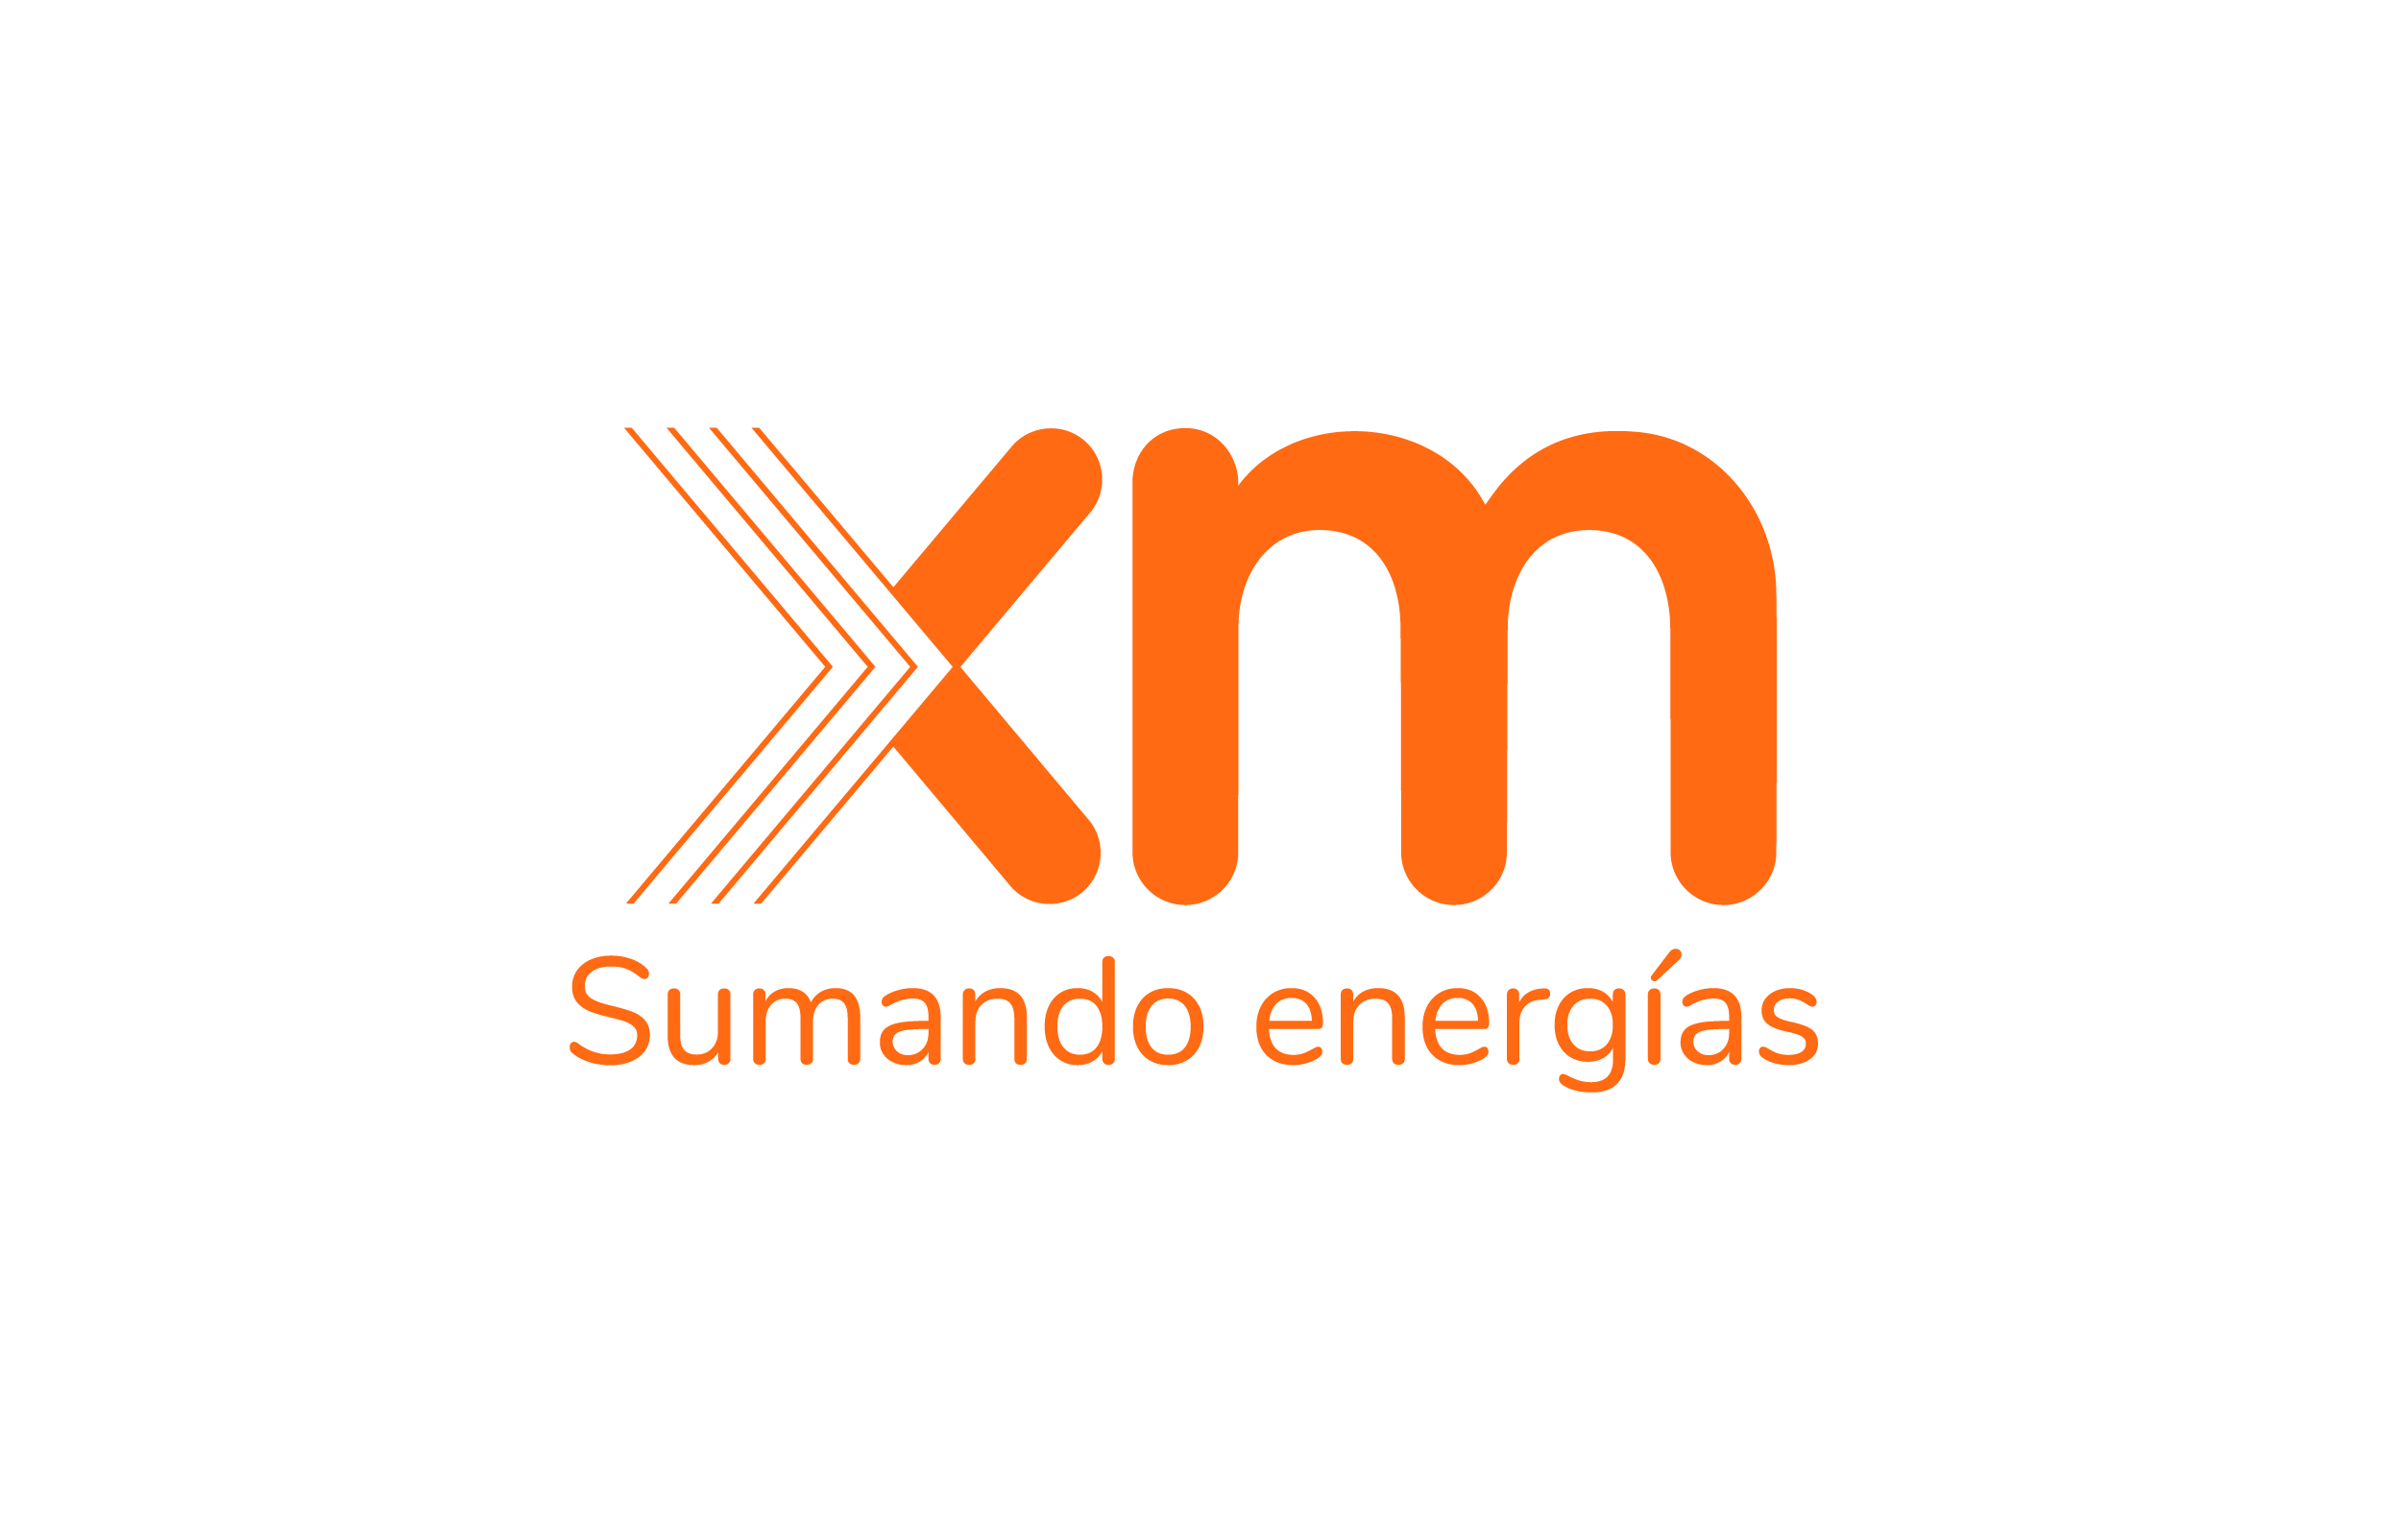

# Primer Ejemplo

En este primer ejemplo se debe cerciorar que la librería pydataxm se encuentra instalada en el equipo a ejecutar MS Power BI. Para ello, por favor abra un prompt o terminal, y ejecute la siguiente línea de comando:

In [3]:
#pip install pydataxm

Note: you may need to restart the kernel to use updated packages.


**Paso 1:** Este es un ejemplo de terminal, y la línea que se debe ejecutar

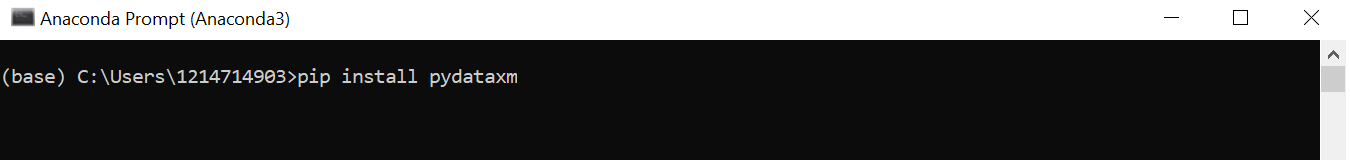

Al término de esta ejecución, por favor abra MS Power BI.

**Paso 2:** En la siguiente imagen que corresponde al inicio de Power BI Desktop, por favor dirigirse hacia la parte de *Obtener datos*; y dar click sobre él.

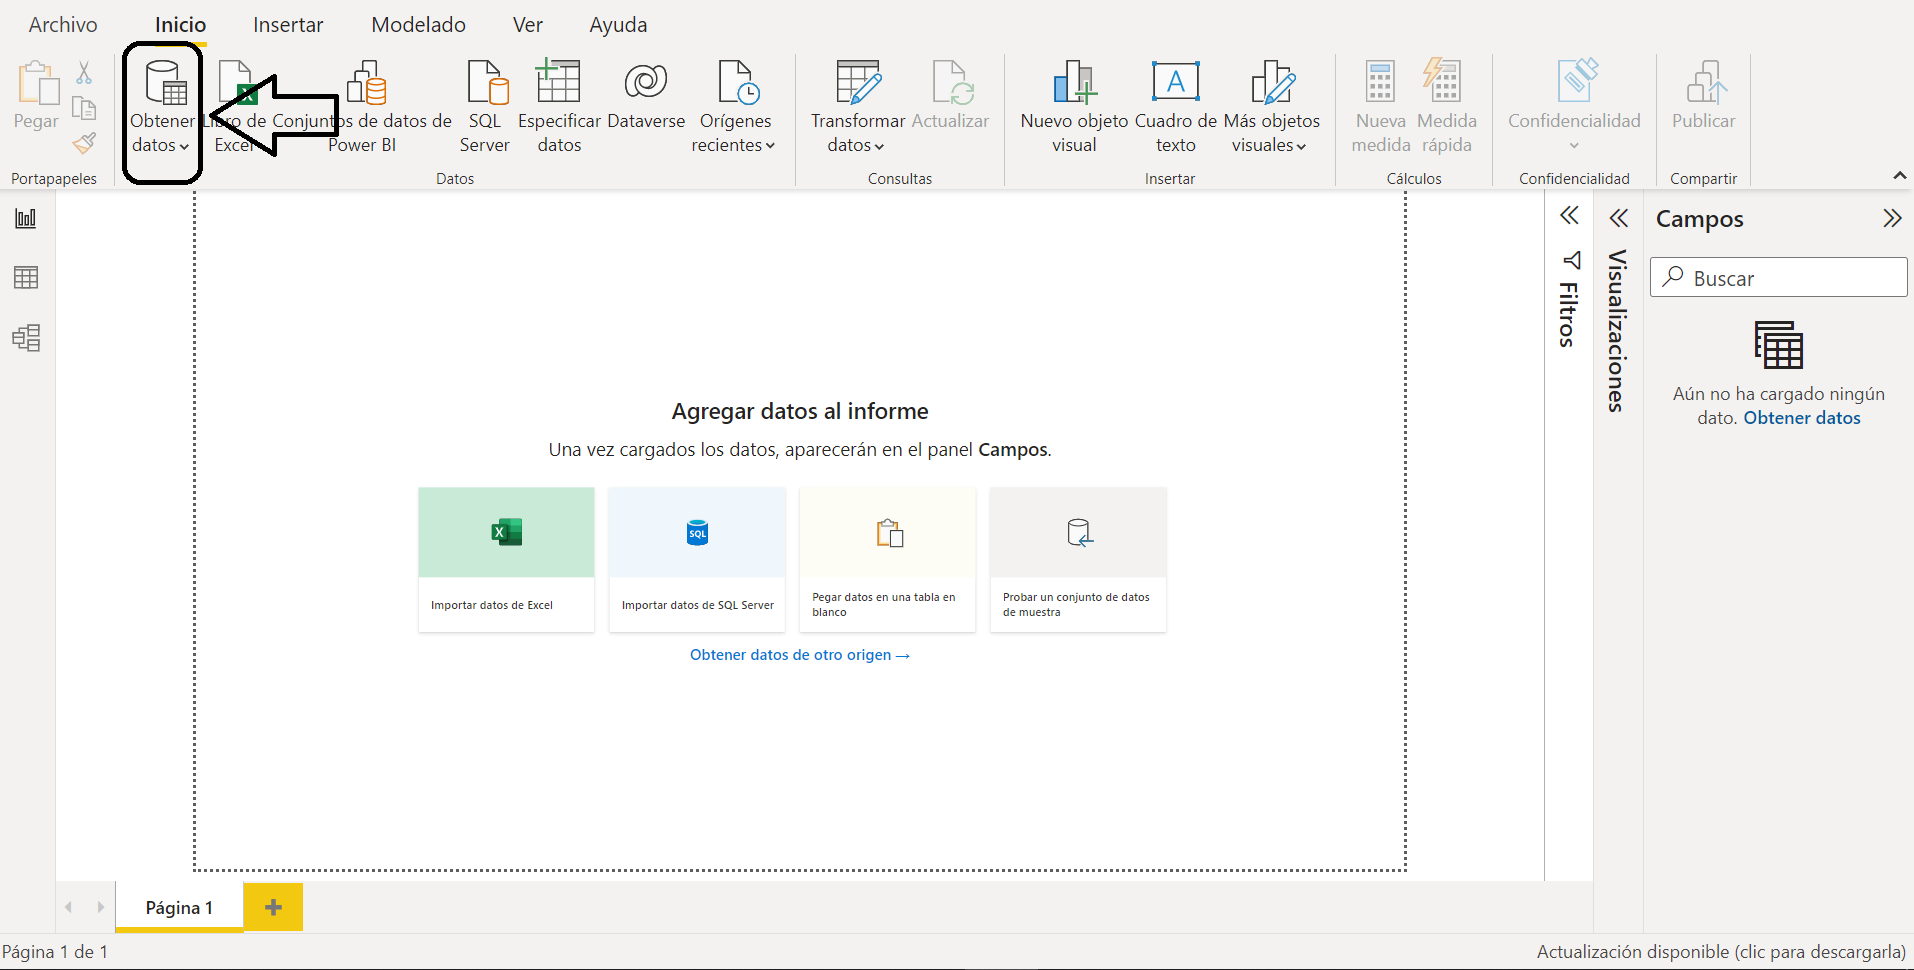

**Paso 3:** Por favor escriba *python* como se muestra a continuación. Posteriormente seleccione *Script de Python*, y dé click en la casilla *conectar*.

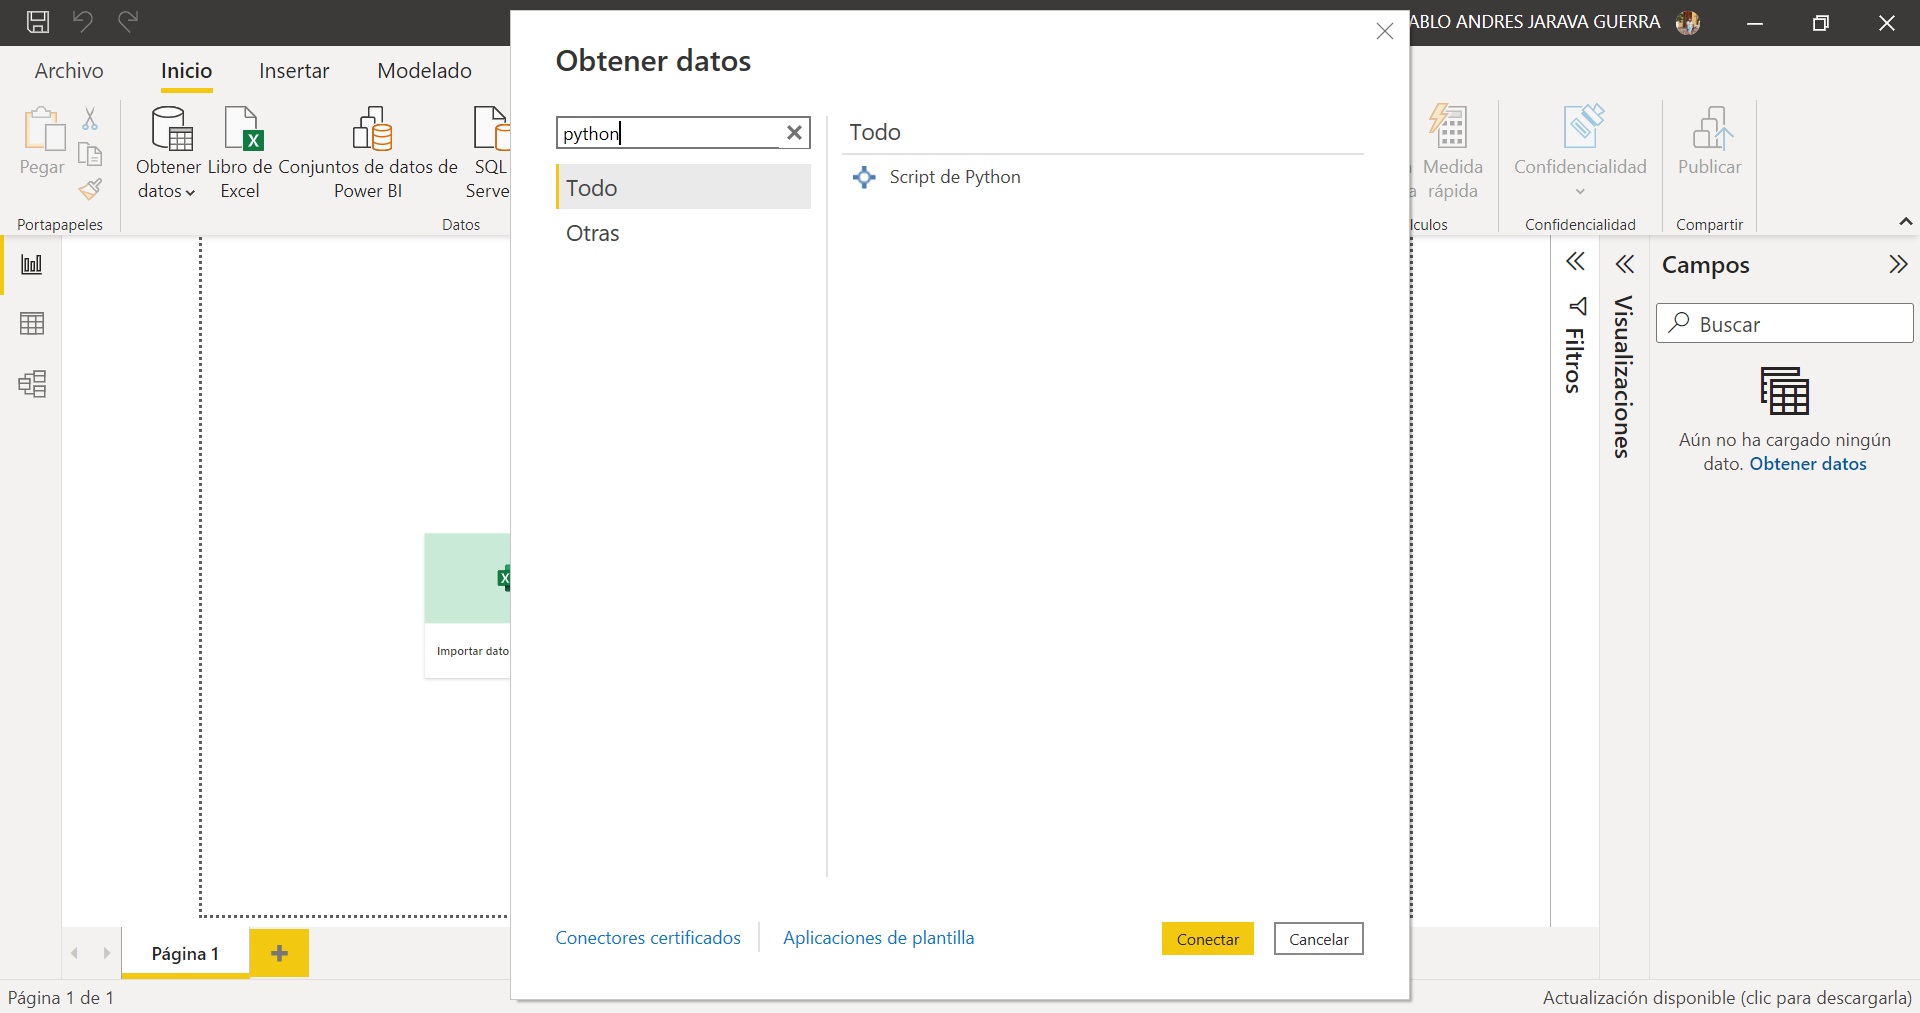

Luego de esto, se desplegará una consola donde se debe ingresar el código de python con el cual se cargará la información.

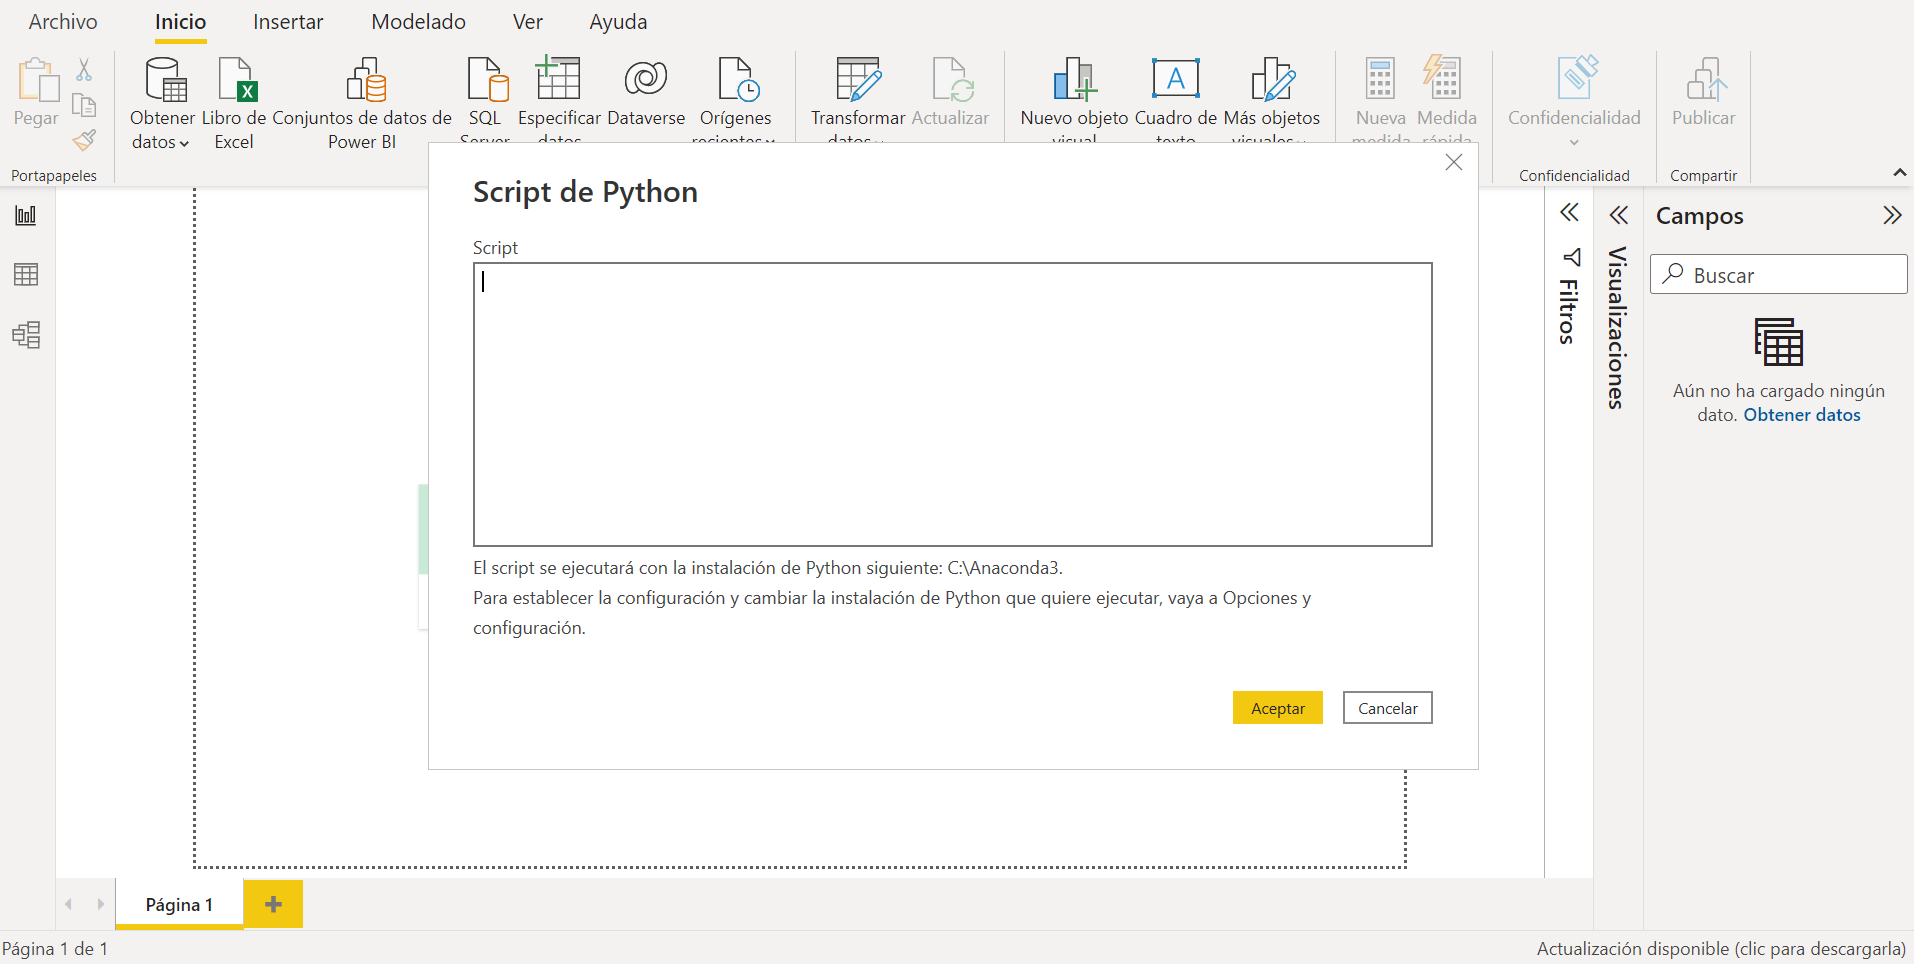

**Paso 4:** Importar la información para visualización. Se hará para la variable: *Demanda Comercial por Agente*.

En el presente ejemplo se desea cargar y visualizar la información relacionada en *Demanda Comercial por Agente*, para el mes de Enero del año 2022.

Vale la pena aclarar que dependiendo de la granuralidad, la información obtenida estará filtrada de forma horaria, diaria; o mensual. Con este insumo, es posible tener aproximación adecuada en visualización tipo diagrama de barras, o diagrama de líneas.


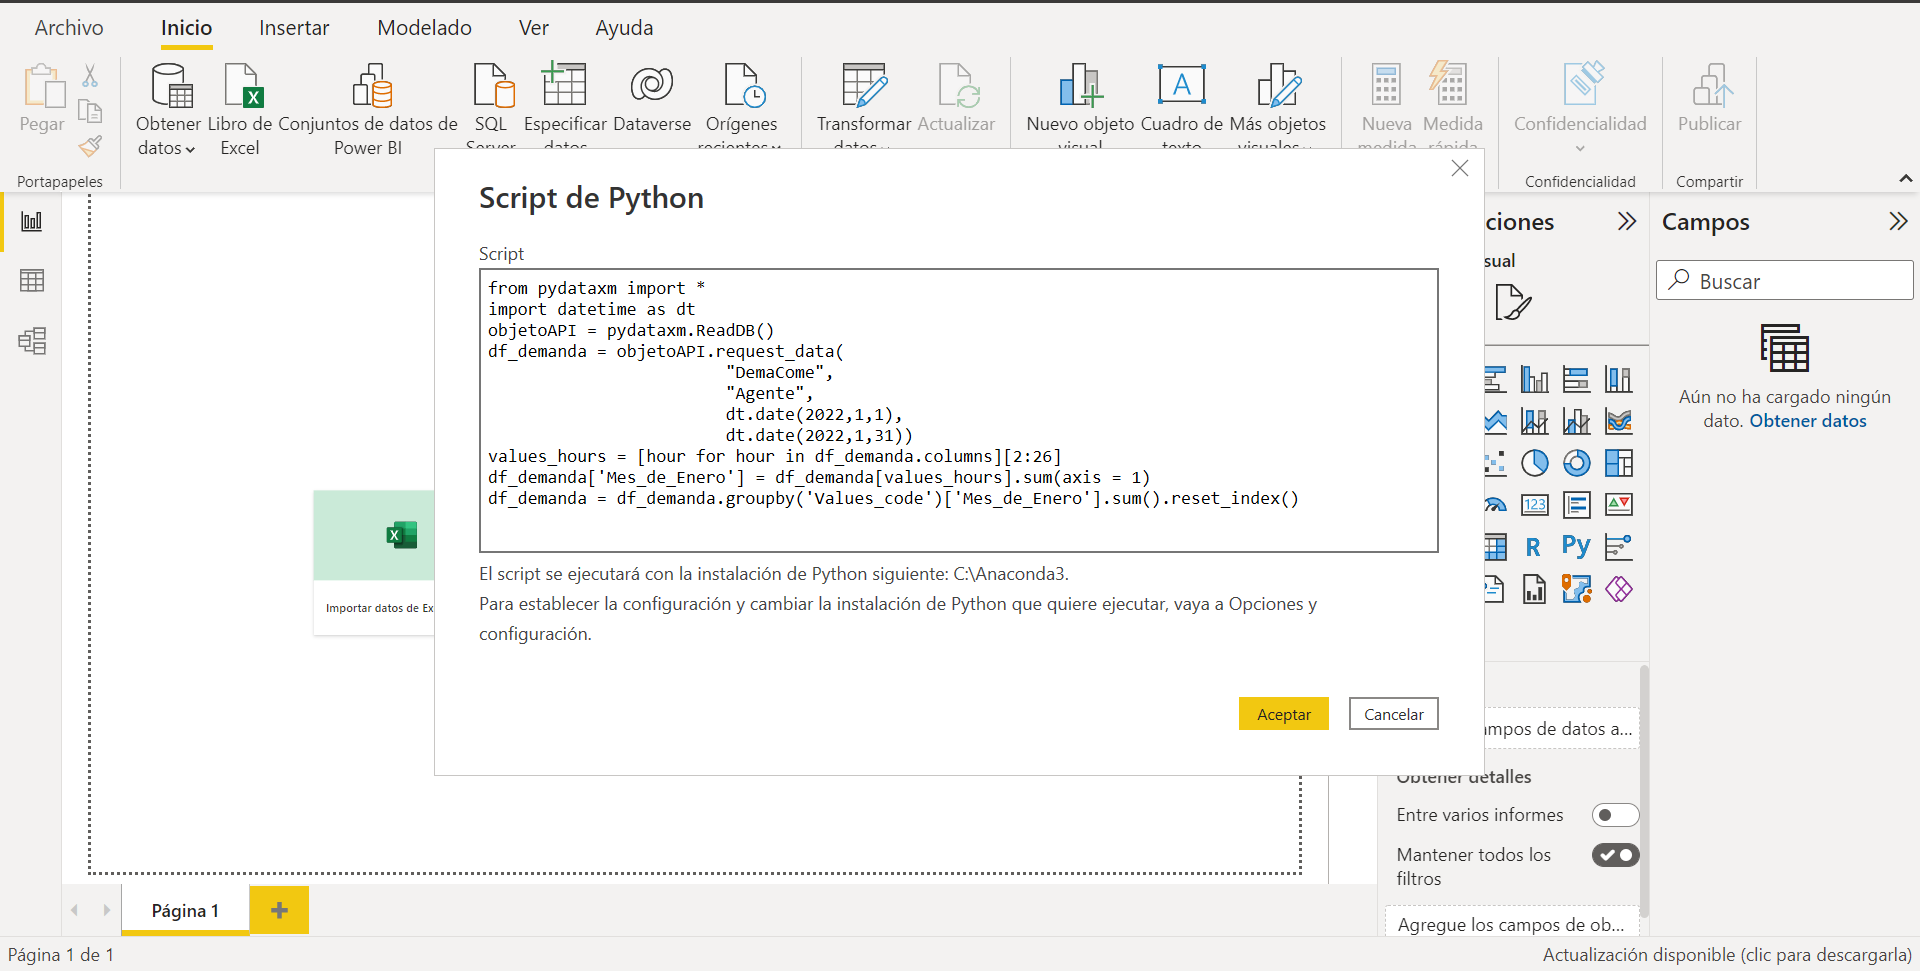

En la ventana del *script de python*, por favor ingresar el siguiente código:

In [4]:
from pydataxm import *
import datetime as dt
objetoAPI = pydataxm.ReadDB()
df_demanda = objetoAPI.request_data(
                        "DemaCome",                                                # Se indica el nombre de la métrica tal como se llama en el campo metricId
                        "Agente",                                                  # Se indica el nombre de la entidad tal como se llama en el campo Entity
                        dt.date(2022,1,1),                                         # Corresponde a la fecha inicial de la consulta
                        dt.date(2022,1,31))                                        # Corresponde a la fecha final de la consulta
values_hours = [hour for hour in df_demanda.columns][2:26]                         # Aquí se reúne el nombre de las columnas desde la hora 1 hasta la hora 24.
df_demanda['Mes_de_Enero'] = df_demanda[values_hours].sum(axis = 1)                # Esto se hace para sumar todos los reporte de energía, dado que se encuentra por hora. Así, se obtendrían diario.
df_demanda = df_demanda.groupby('Values_code')['Mes_de_Enero'].sum().reset_index() # Aquí se agrupan los agentes por códigos con sus respectivas demandas comerciales [=] kwh 

Debido a que la información de la demanda comercial la vamos a agrupar para todo el mes de Enero, es por ello que realizamos la suma horaria que se denota en el código anterior.

Empero, como se podrá observar en la información contenida en la API; existen diferentes variables, los cuales se pueden servir a utilizar como parámetros de consulta. 

**Paso 5:** En la siguiente parte de este proceso, se aparecerá una previsualización tipo tabla de la información contenida. Por favor denote que la información traída es estructurada

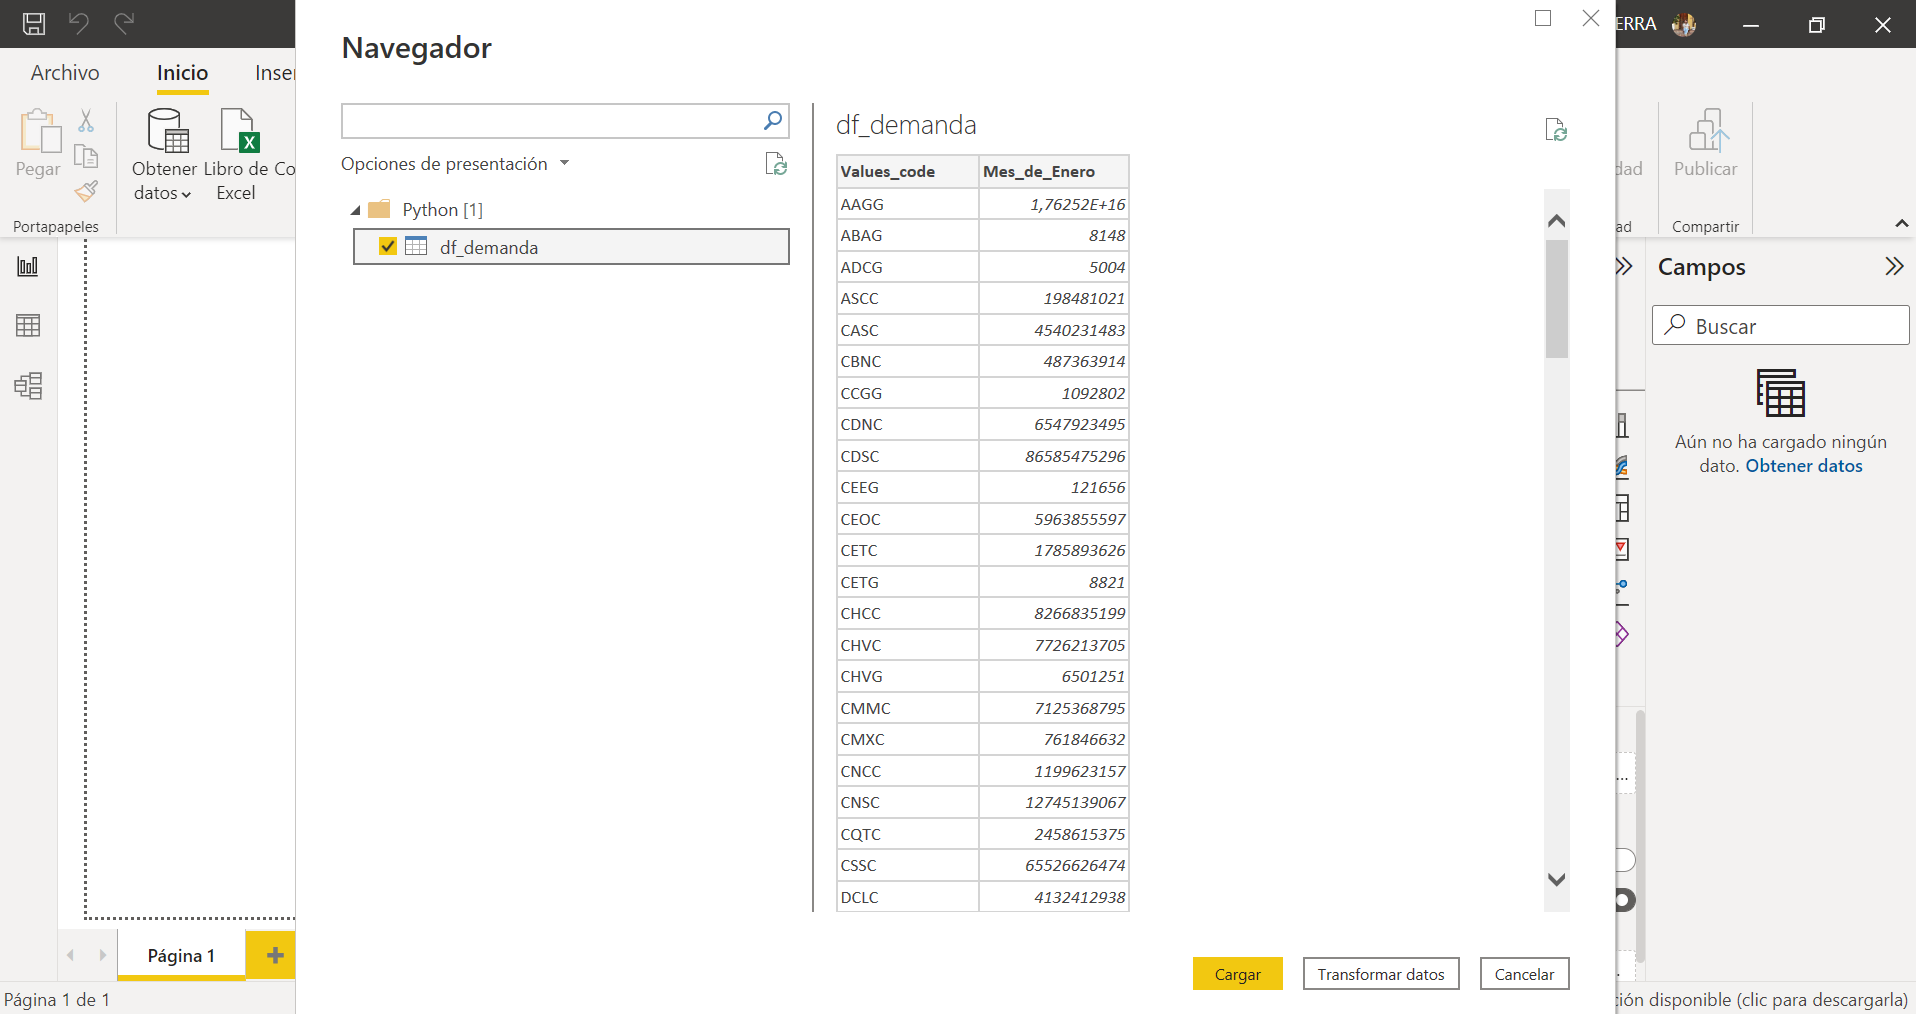

En la siguiente parte, usted observará su información guardad en la parte lateral de derecha, con el mismo nombre que fué cargado al sistema.

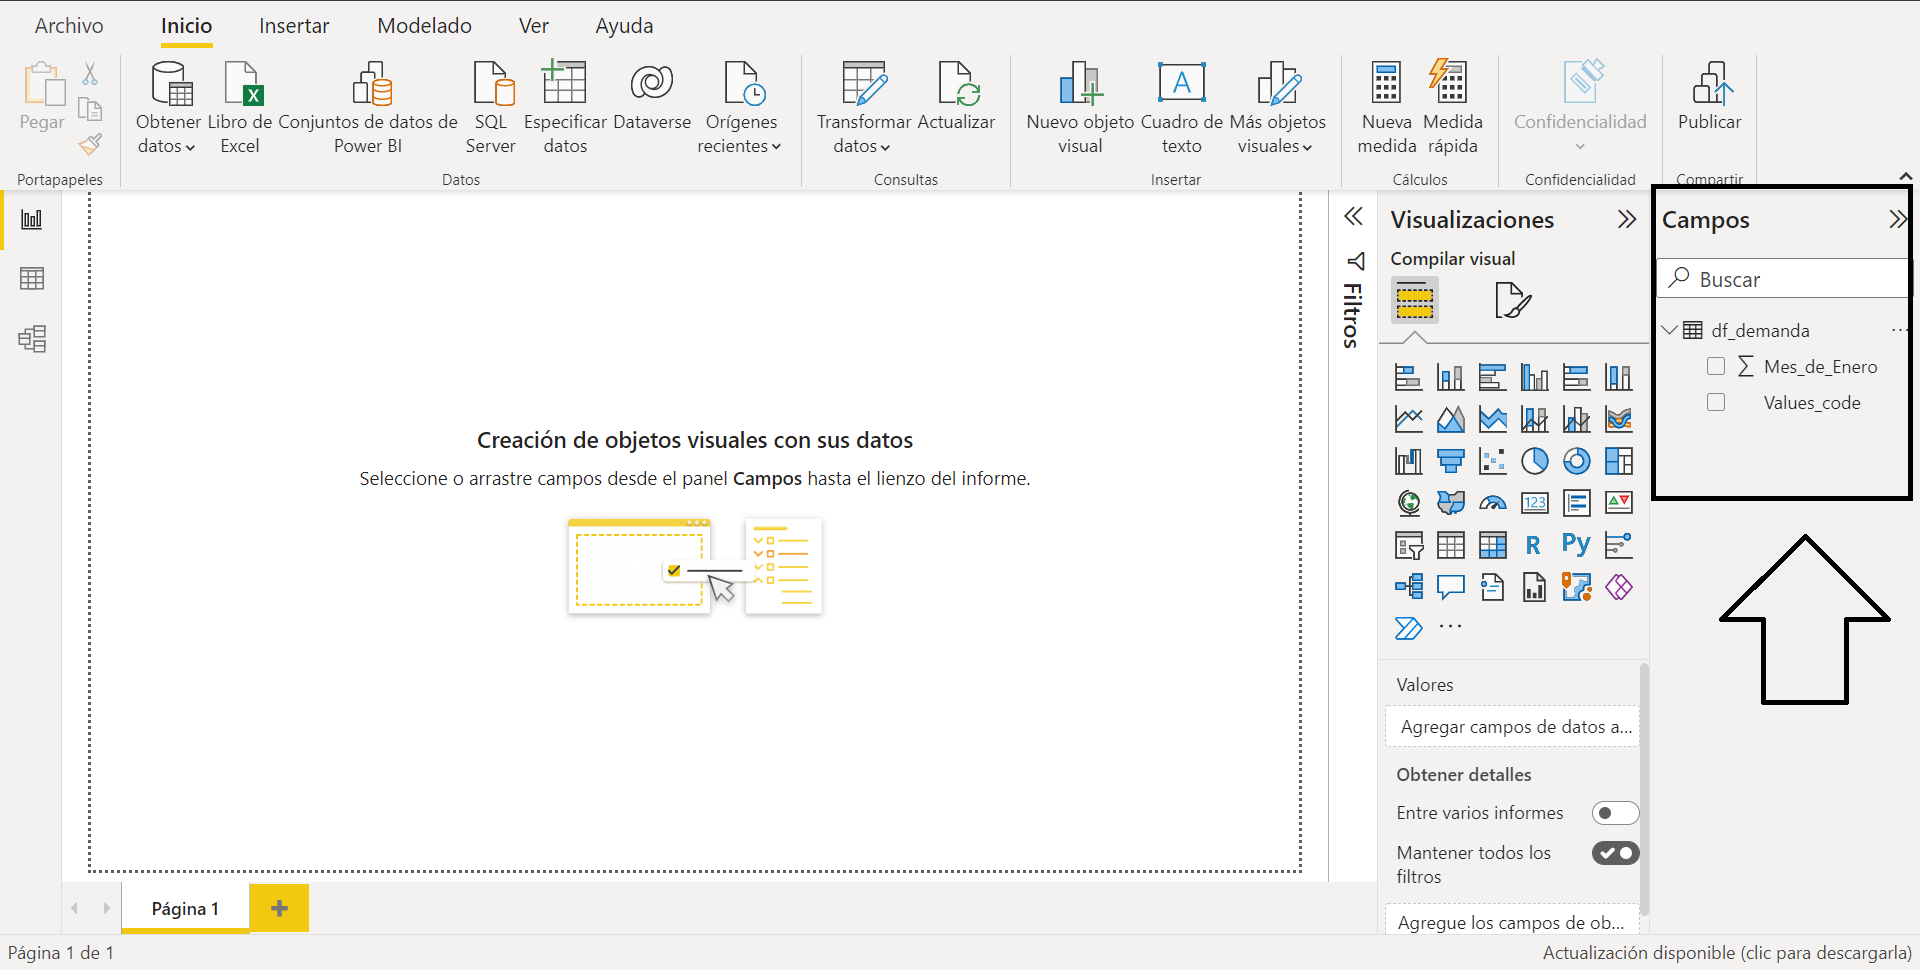

**Paso 6:** Uso de un diagrama de barras para visualizar la información importada.

Por favor seleccione la pestaña donde se encuentra la información próxima a visualizar (ver área de **Campos**), y seleccione las columnas que desea visualizar.

Seleccionar el tipo de gráfico que desea visualizar dándole *click* sobre el logo.


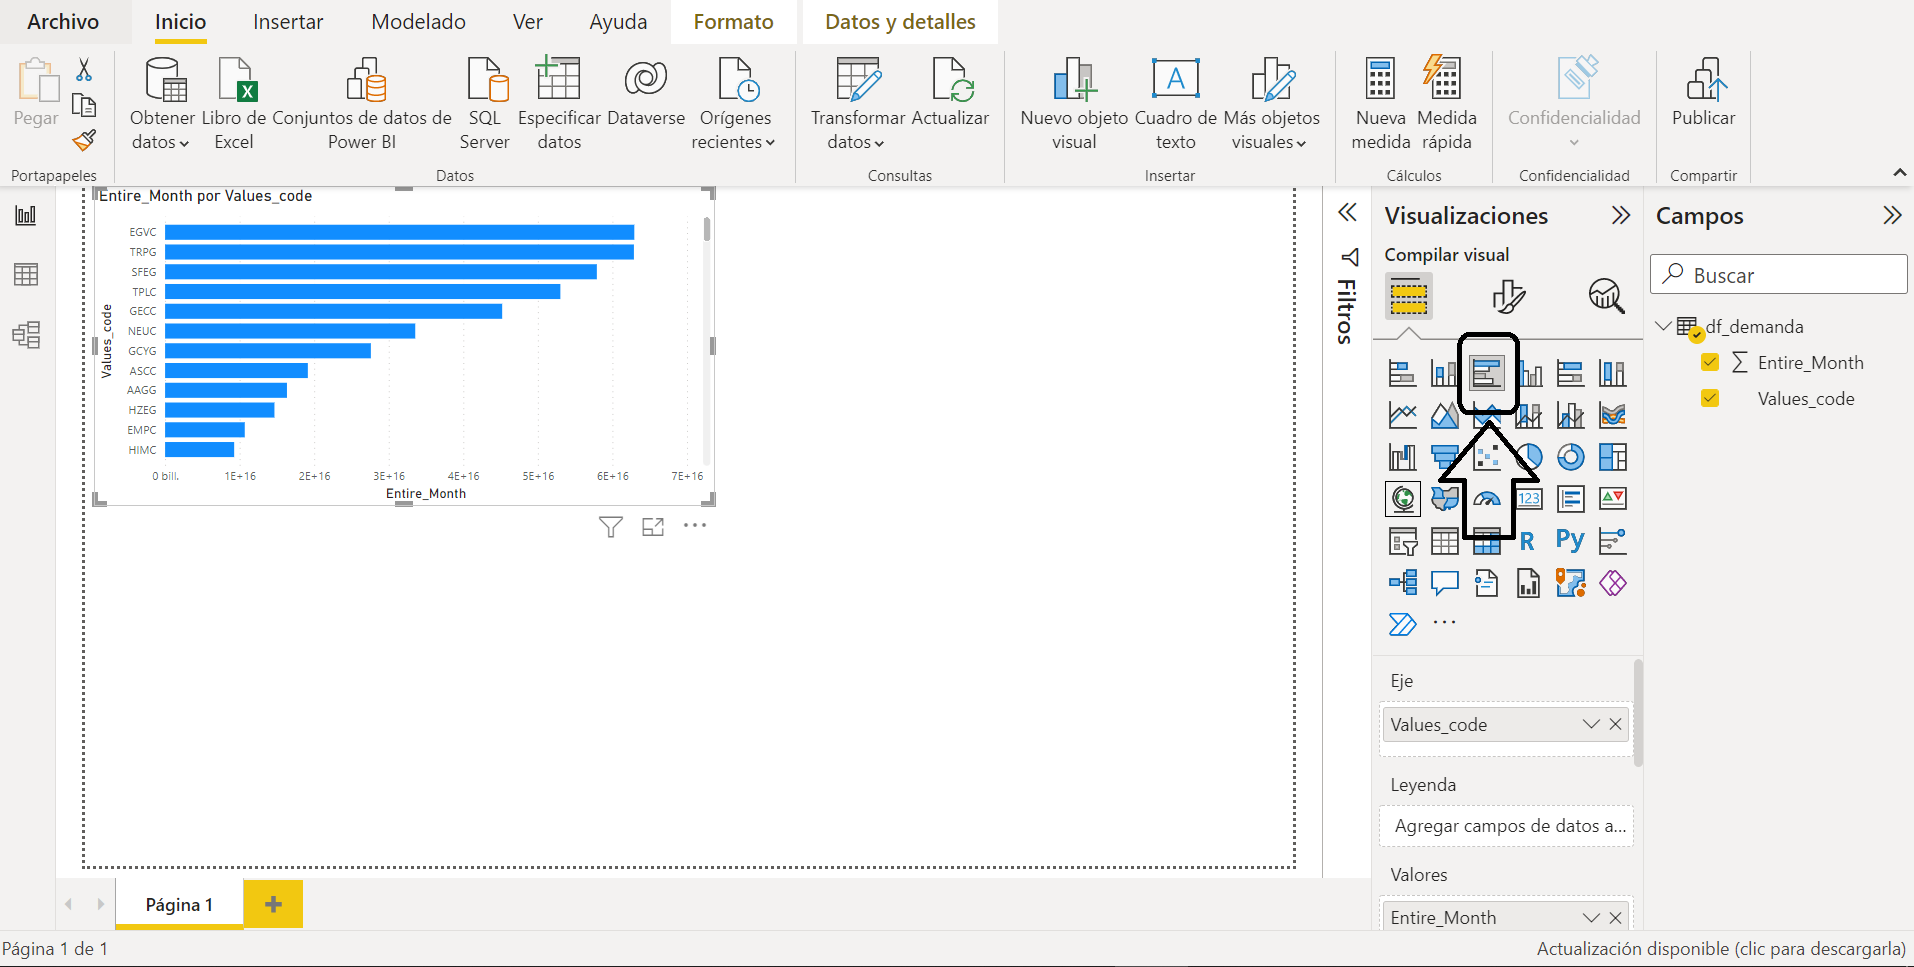

Como se podrá observar, el nombre asignado a nuestras columnas se refleja de forma fiel sobre los ejes de los gráficos. Es por ello que resulta conveniente modificarlos para una mejor apreciación. Al lado de la derecha de cada nombre de columna hay tres puntos (...), por favor dar click sobre ellos y seleccionar: *cambiar nombre*

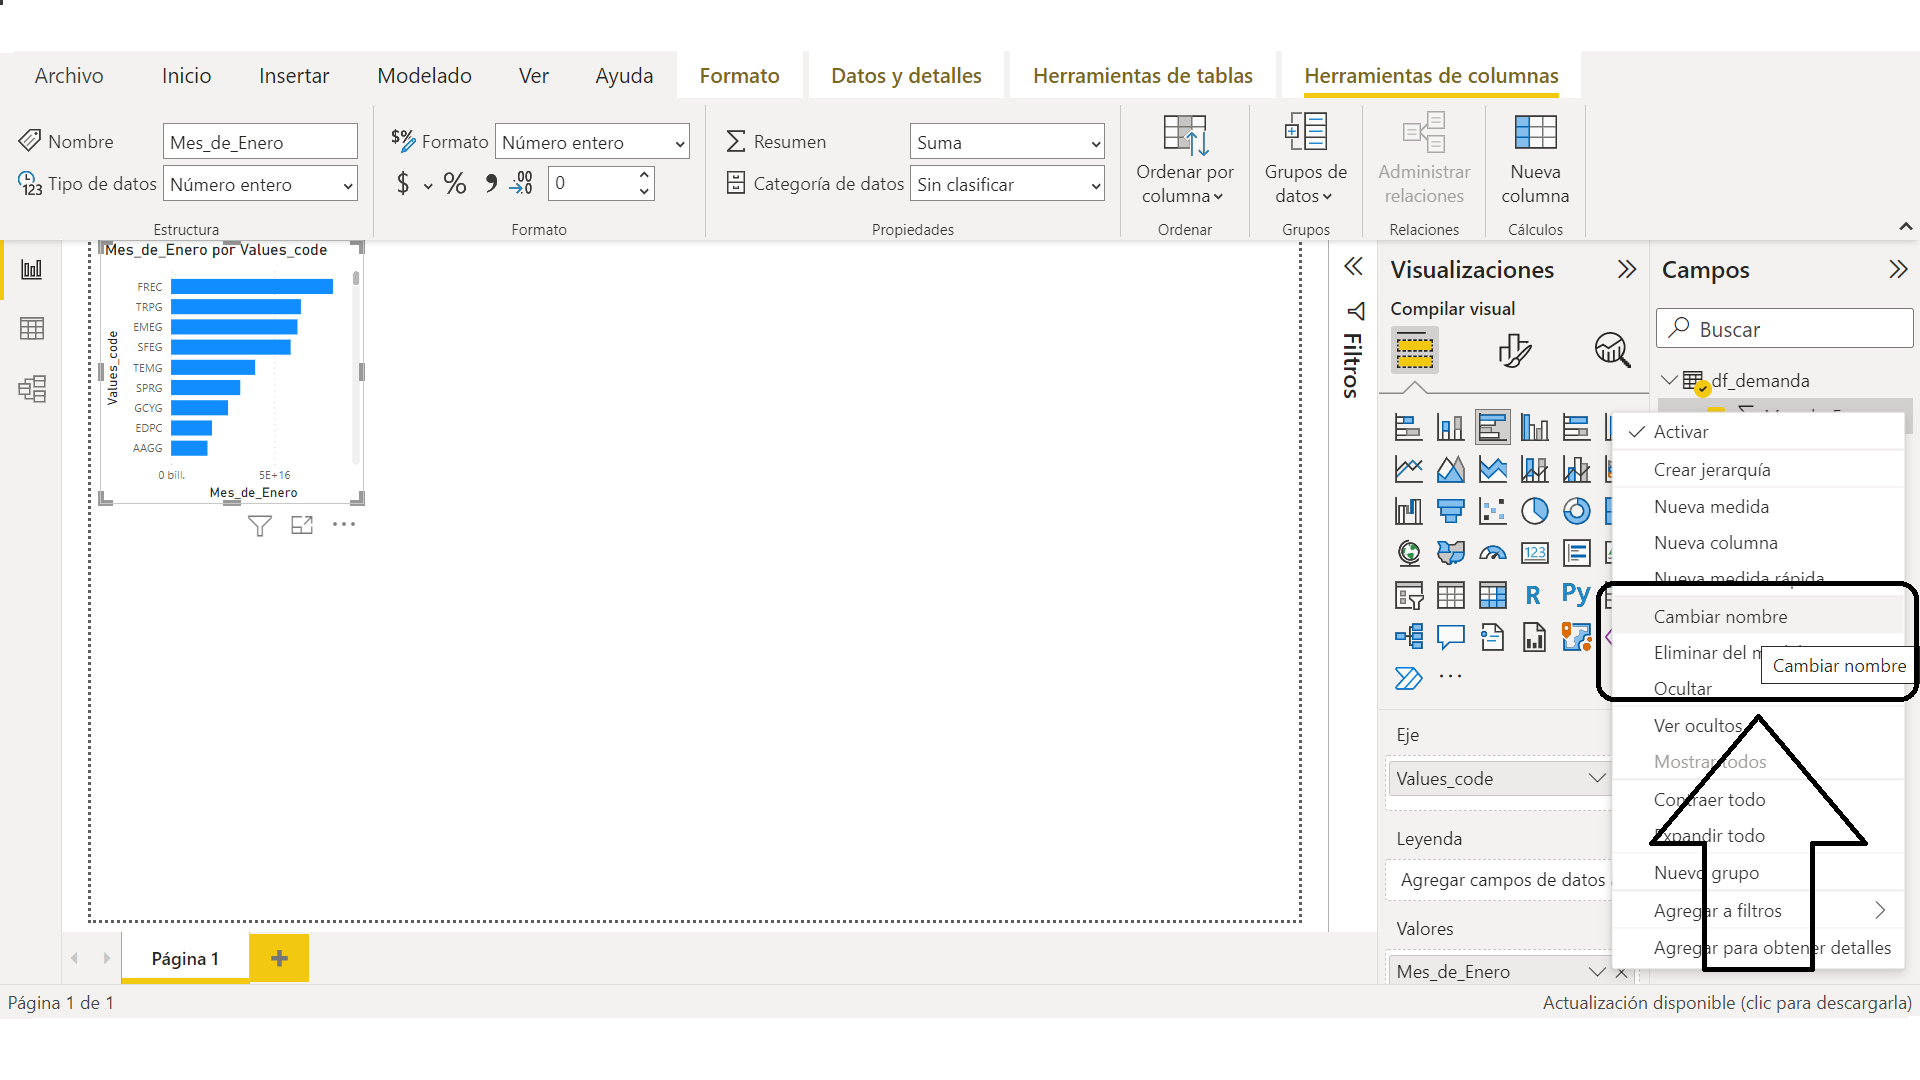

La información que se obtuvo a través del script de python, fué la demanda comercial codificada por agente en unidades de kilovatios-hora.

Entonces los modificamos de esta forma:
    **Values_code:** Código_Agente
    **Entire_Month:** Demanda Comercial [=] kwh

**Paso 7:** De forma adicional, se puede visualizar la información cargada en forma de tabla para facilitar su exploración.

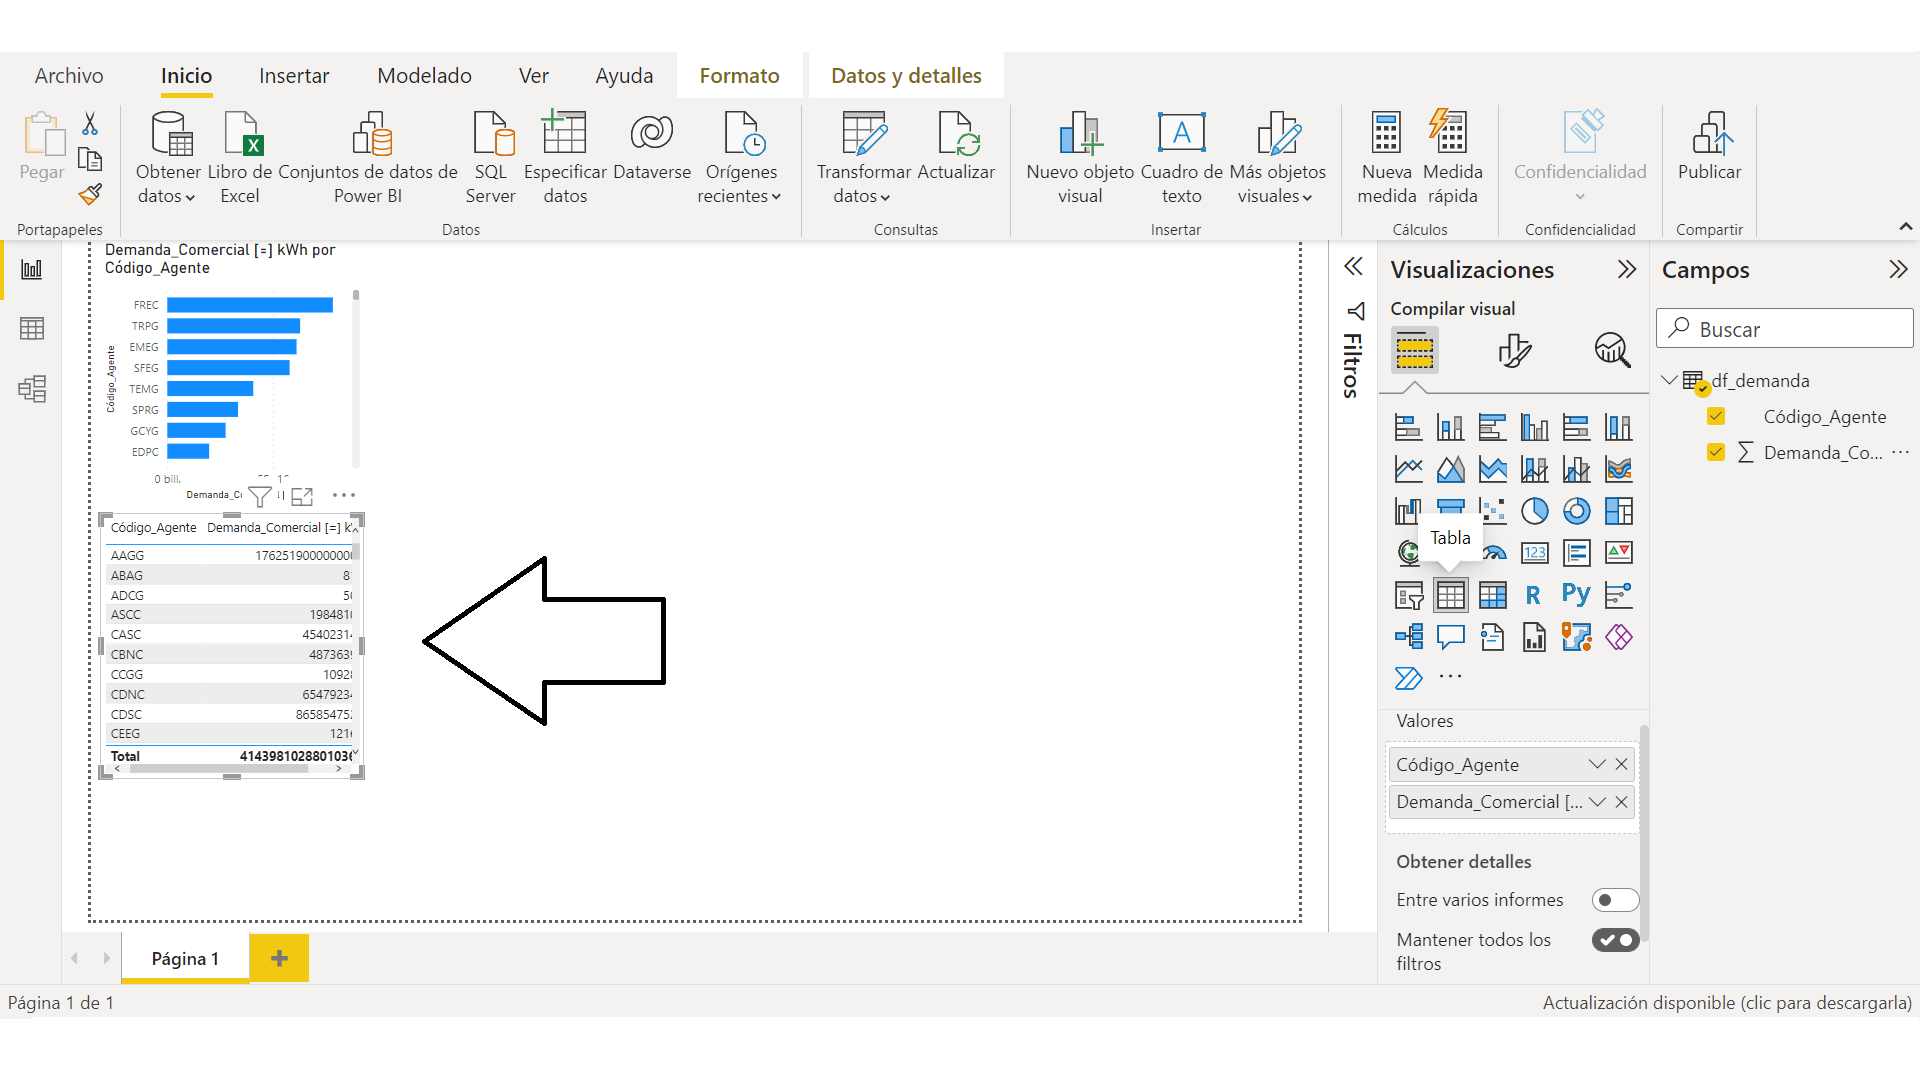

Por favor observe que la herramienta Power BI, nos permite visualizar de acuerdo con ciertas medidas en el despliegue del gráfico. Es decir, al manipular el tamaño de la visualización se podrán apreciar ciertas variables. 

Para este caso en específico, a medida que se hace más grande, podremos observar las observaciones de las variables de menor magnitud. 

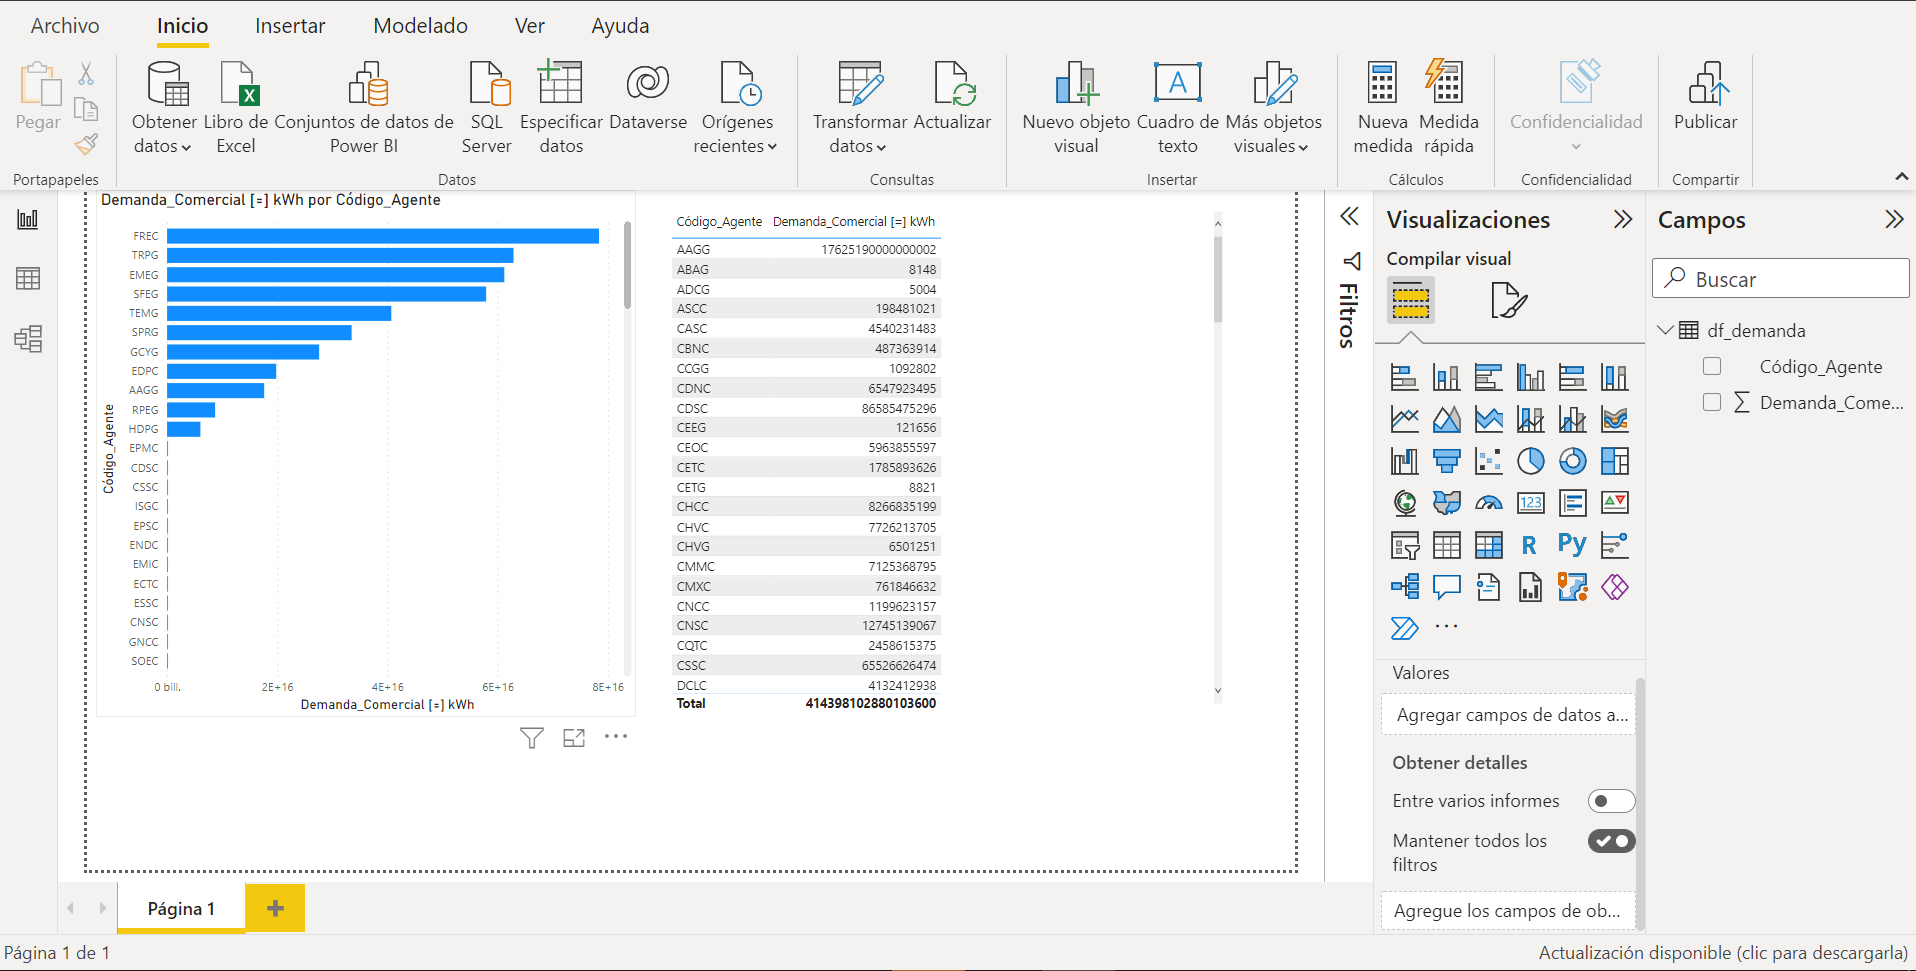

# Segundo ejemplo

En este ejemplo propendemos por medio del método visto anteriormente, obtener un gráfico de líneas del precio de bolsa.

Notar que el precio de bolsa se dá de forma horaria, entonces optaremos por obtener un promedio diario y su posterior representación.

Para realizar dicha actividad, usaremos el siguiente script de python en la ventana de Power BI.

In [ ]:
from pydataxm import *
import datetime as dt
objetoAPI = pydataxm.ReadDB()
df_pbolsa = objetoAPI.request_data(
                      "PrecBolsNaci",                                               # Se indica el nombre de la métrica tal como se llama en el campo metricId
                      "Sistema",                                                    # Se indica el nombre de la entidad tal como se llama en el campo Entity
                      dt.date(2022, 1, 1),                                          # Corresponde a la fecha inicial de la consulta
                      dt.date(2022, 1, 30))                                         # Corresponde a la fecha final de la consulta
names = [hour for hour in df_pbolsa.columns][2:26]
df_pbolsa['Daily_Average'] = df_pbolsa[names].mean(axis=1)

Esto se realiza nuevamente de la forma:

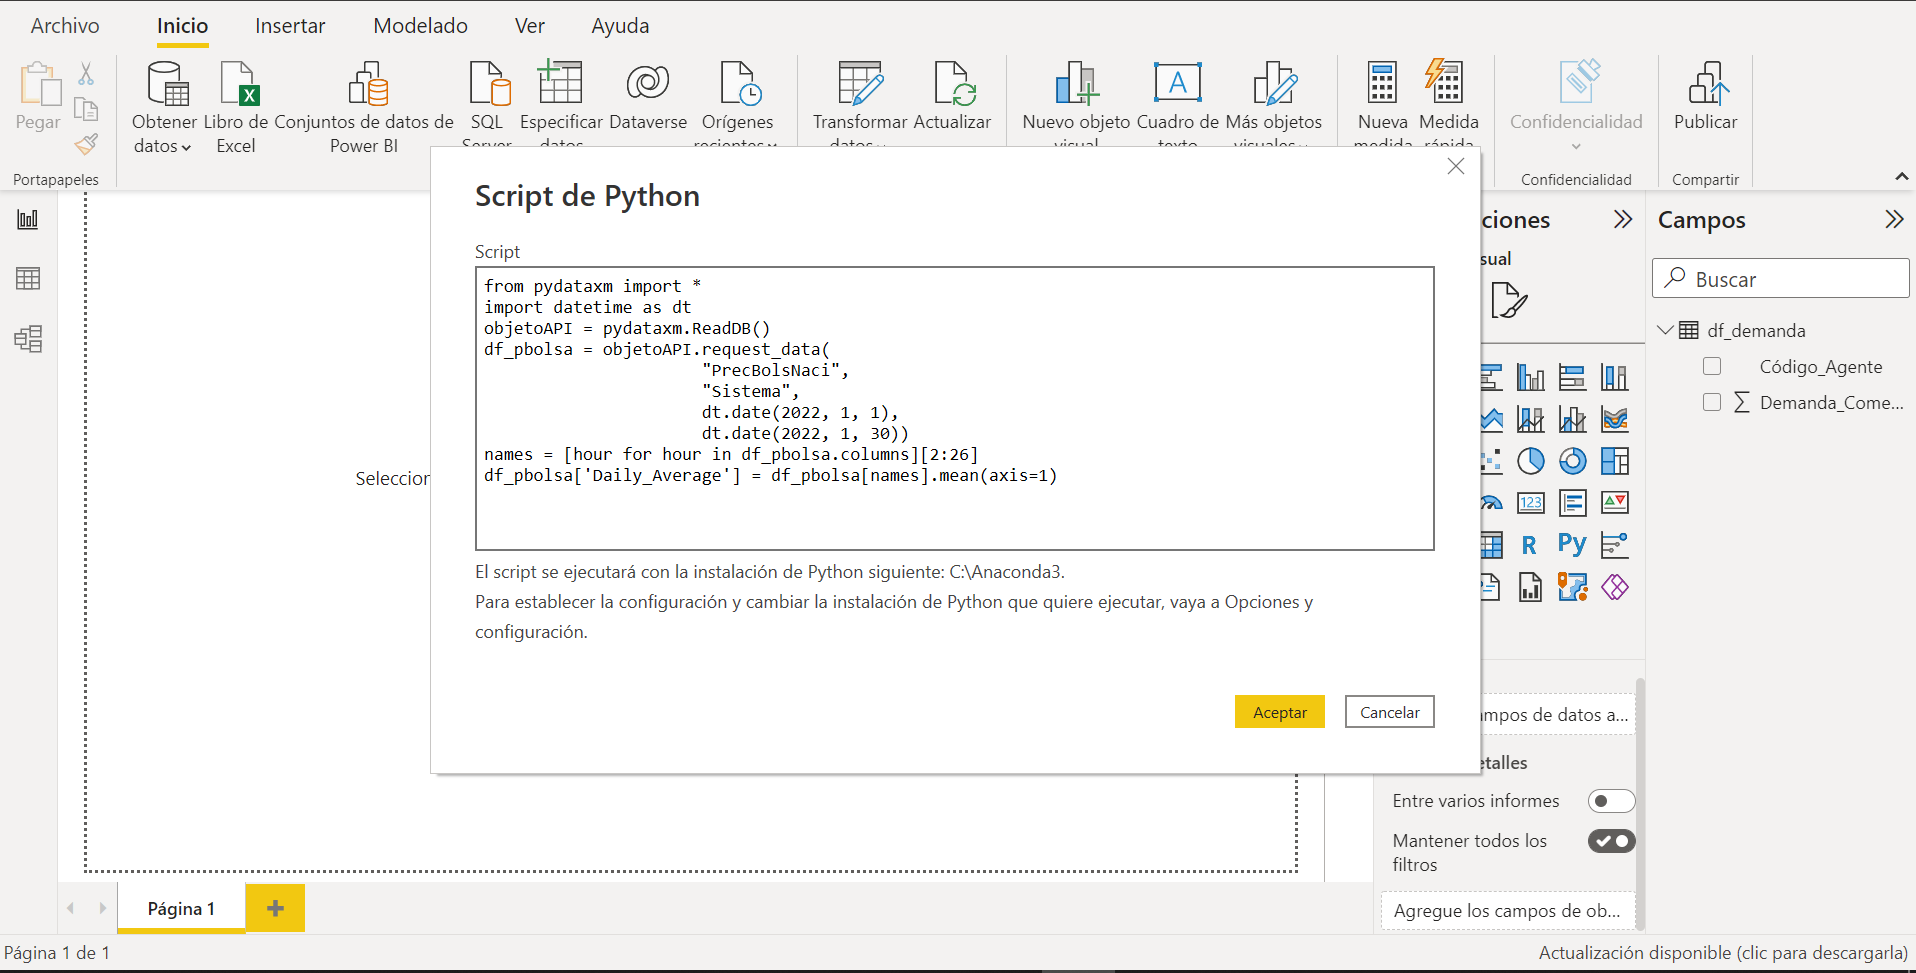

Obsérve que Power BI no elimina nuestros modelos de información previamente cargados.

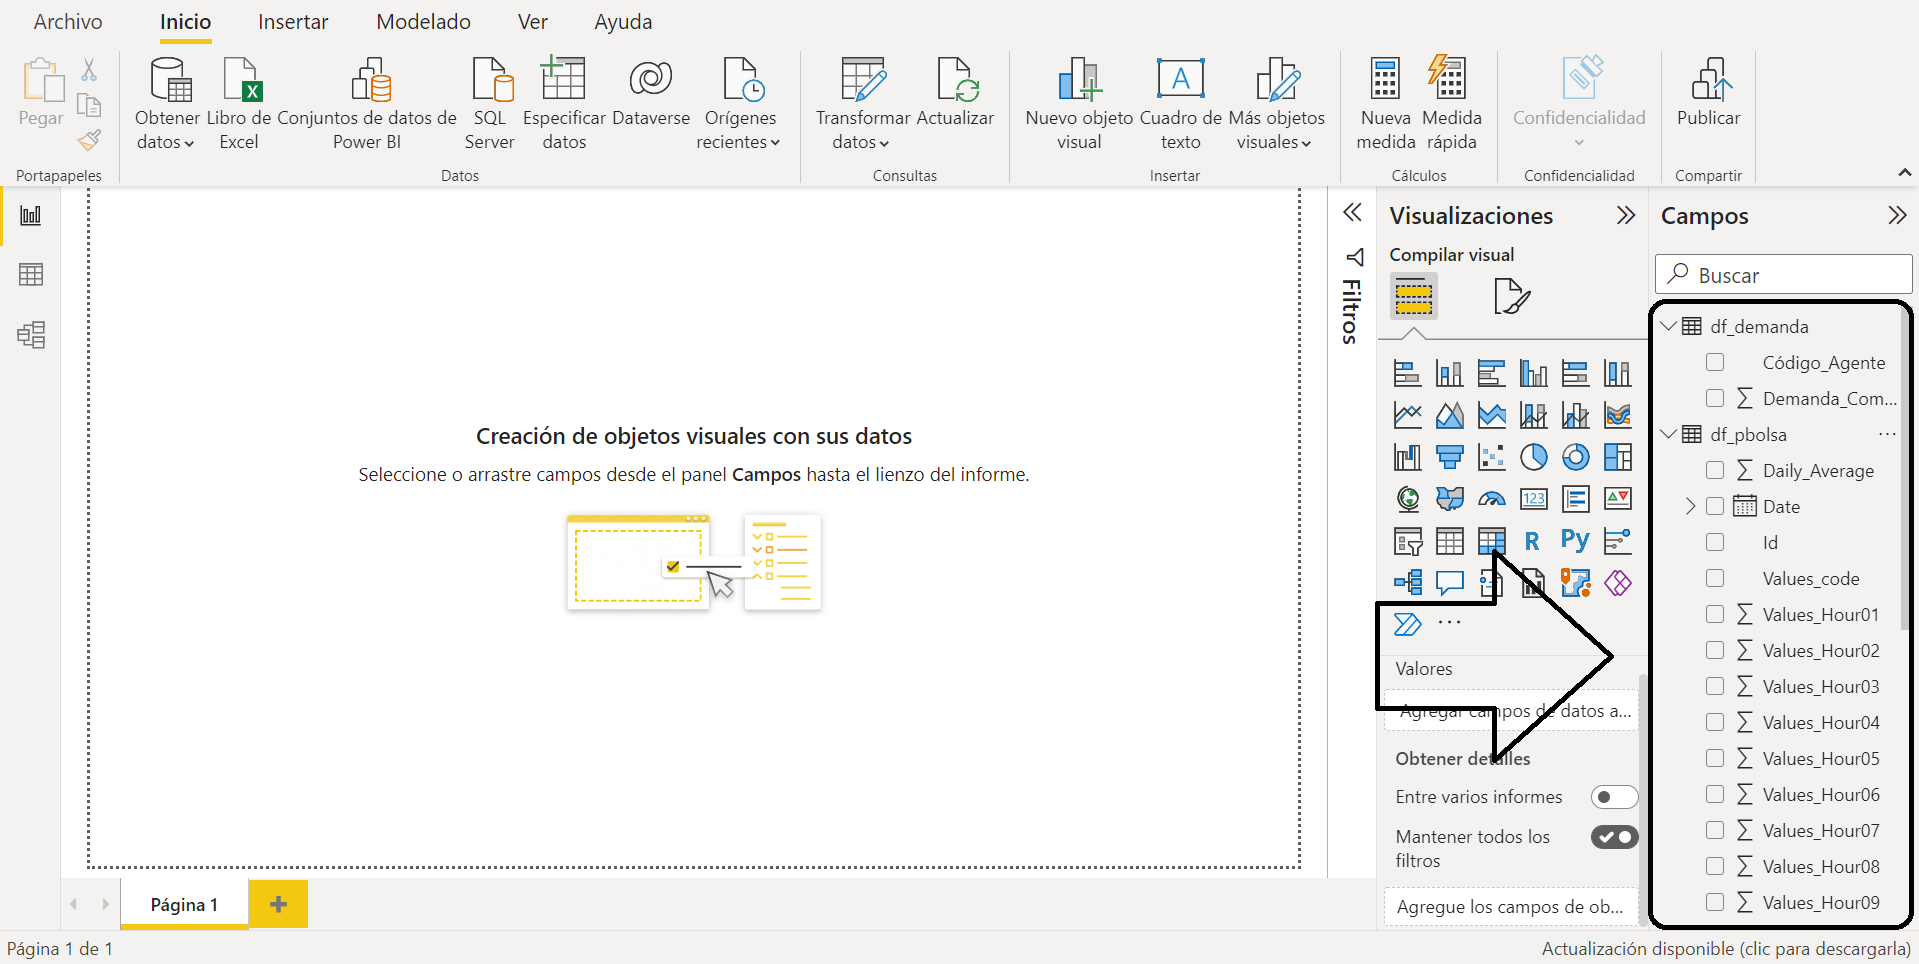

En este caso tenemos una columnada que se llama *Date* (Fecha), la cual por defecto es reconocida en Power BI, y se le asigna jerarquía de su temporalidad, es decir, año, trimestre, mes, y día. Debido a que desemos tener un acercamiento diario, y nuestro rango de fecha corresponde solo al mes de Enero, optamos por escoger **día**.

A continuación procedemos a escoger las columnas: *Daily_Average*, y *Día*. Con su respectiva selección de tipo de gráfico.

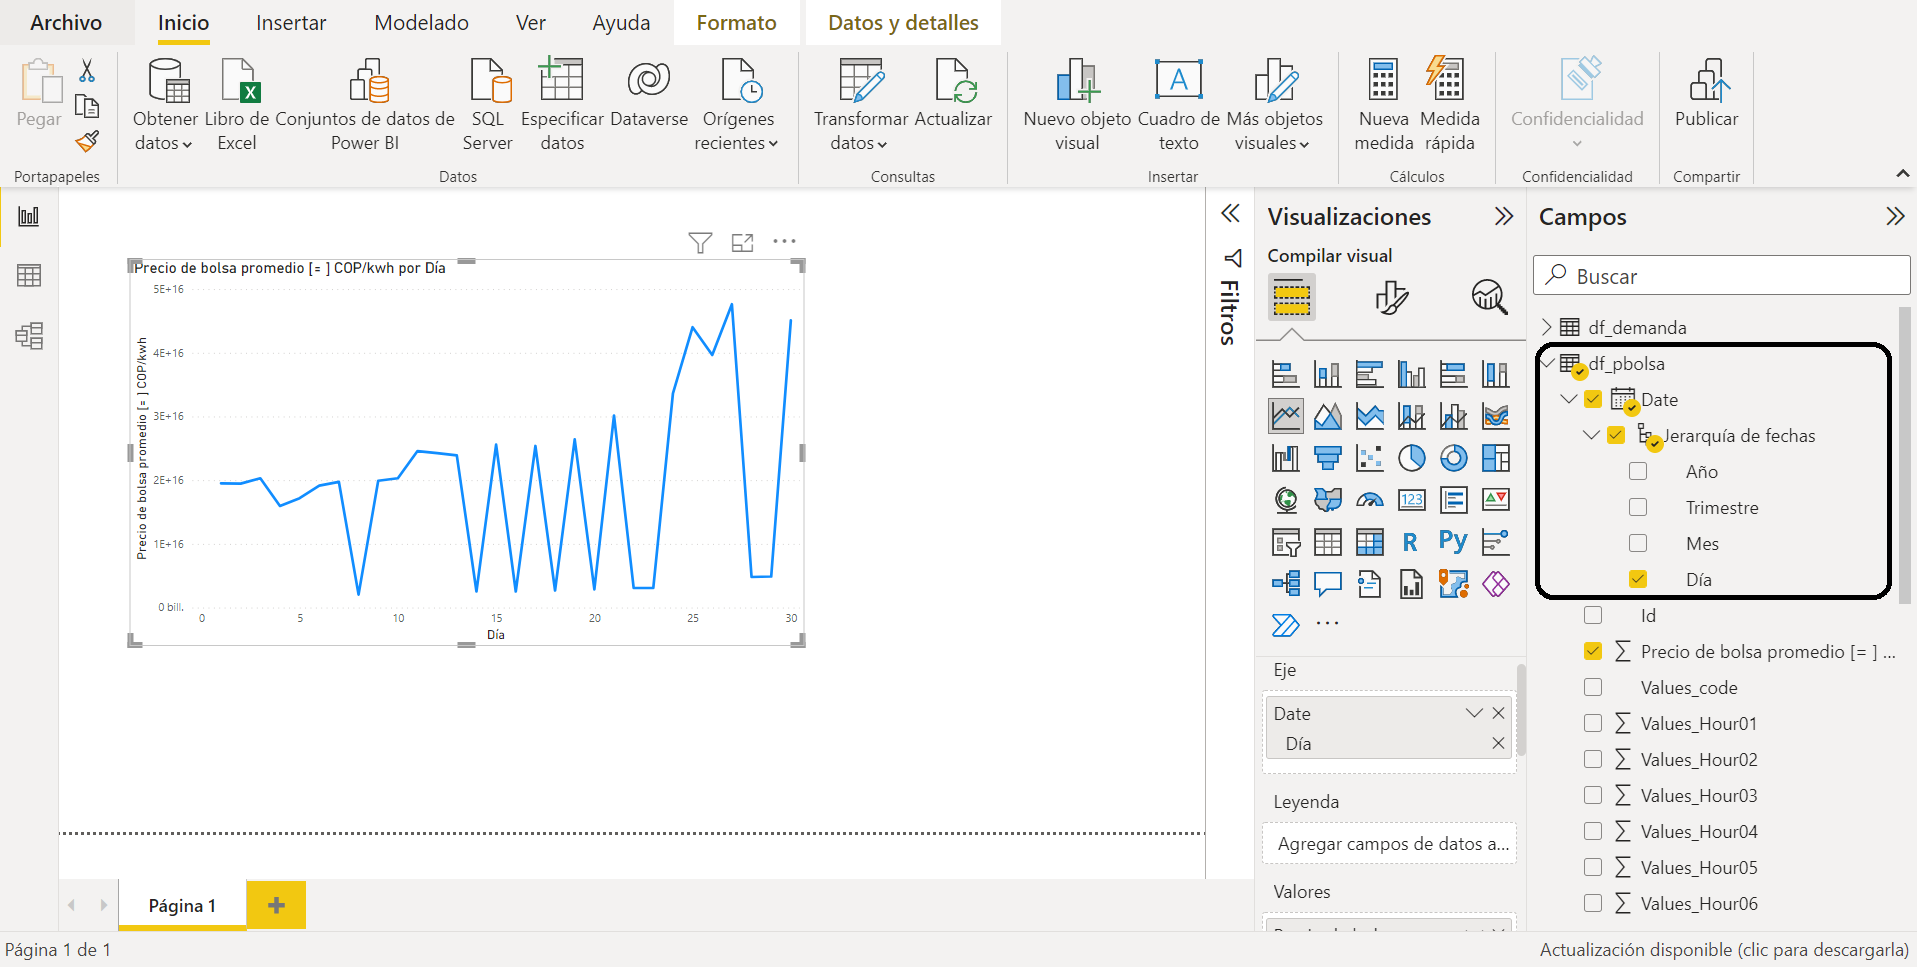

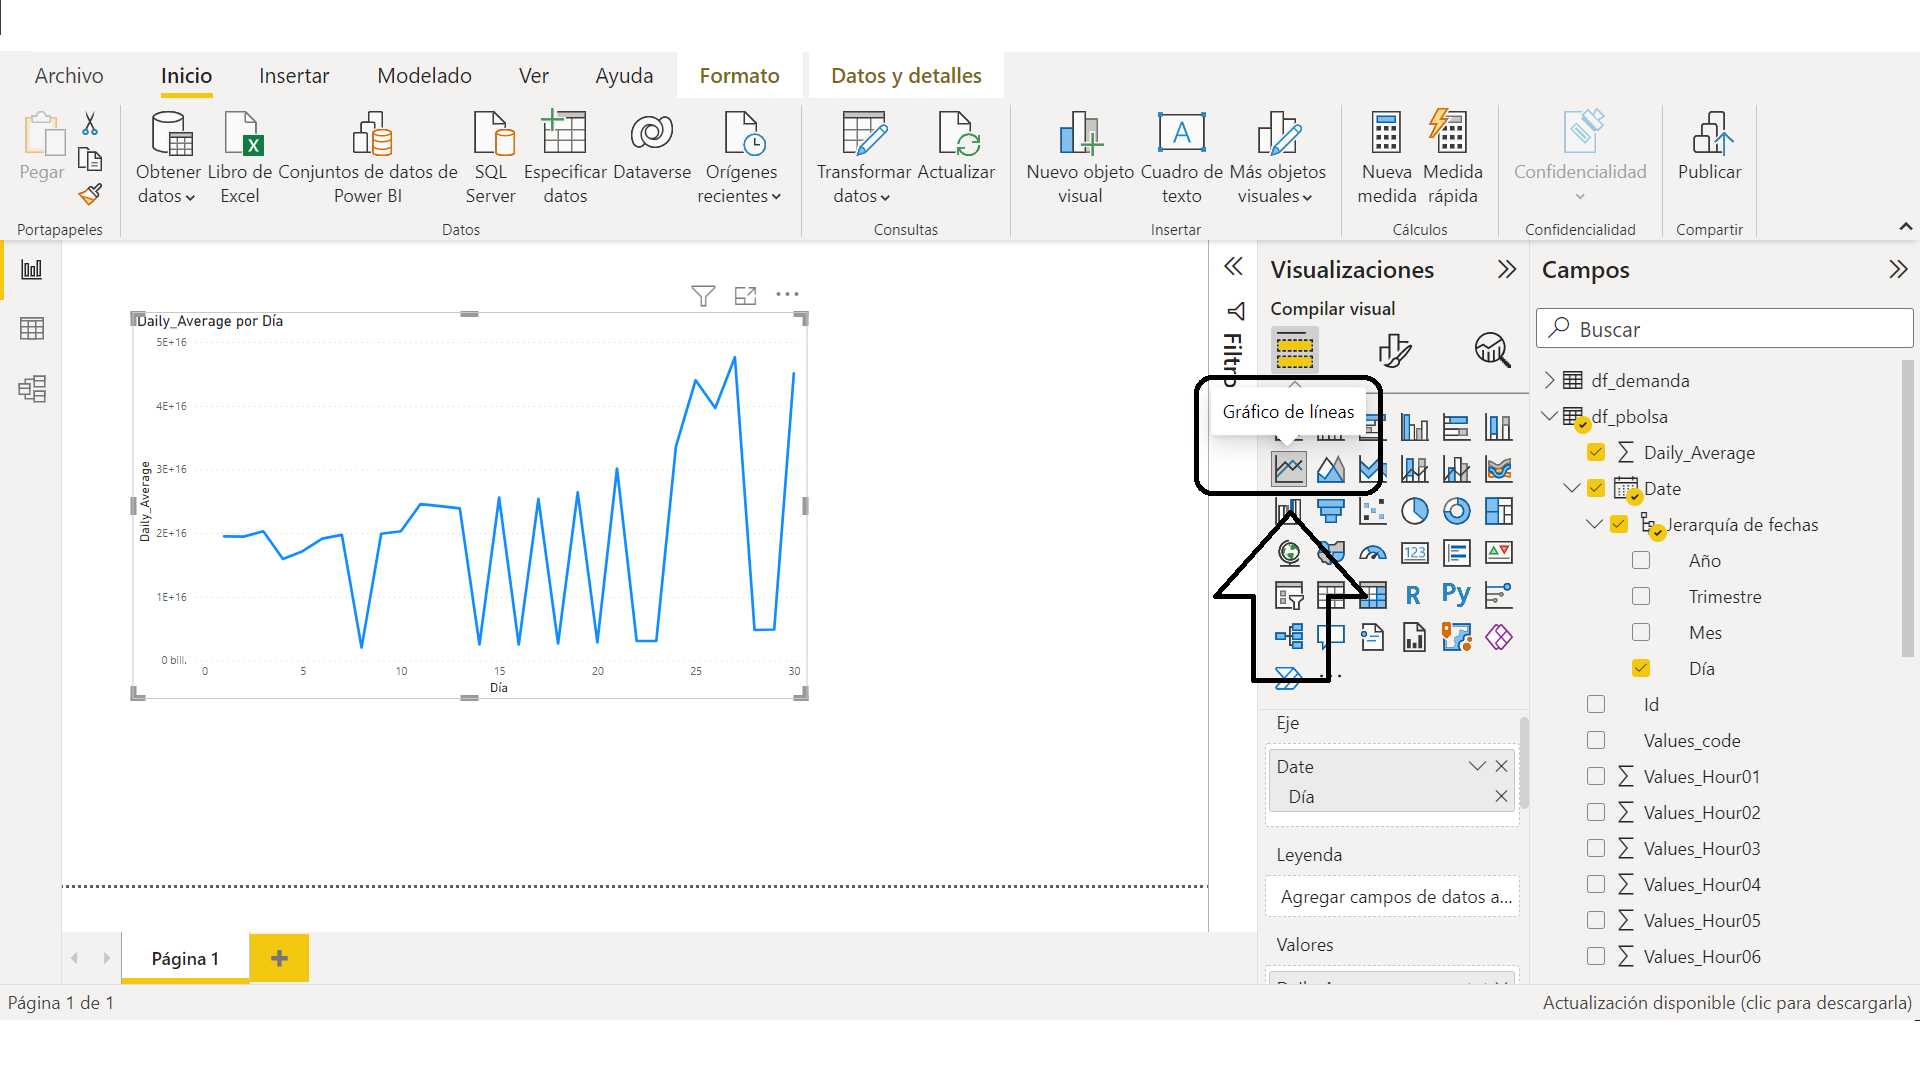

Para finalizar, podemos hacer un cambio de nombre para que sea más entendible.

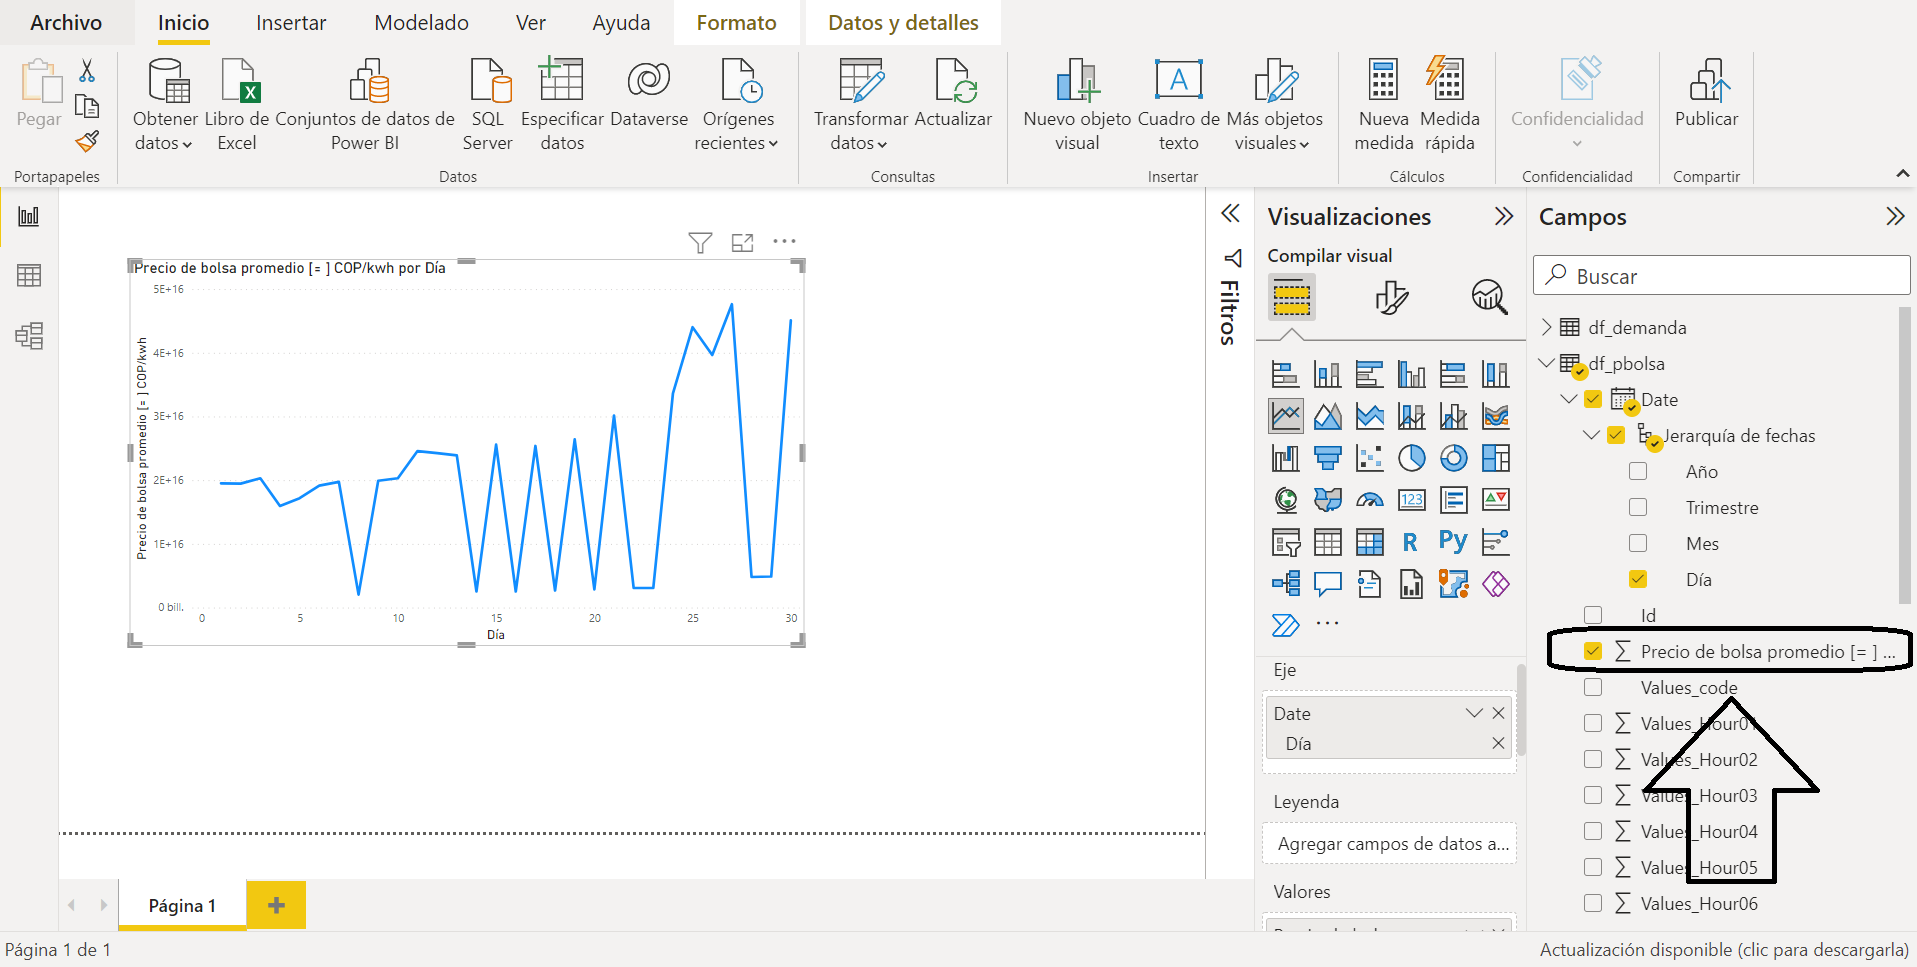

**Conclusiones**

Con el anterior tutorial, se mostró como importar información usando la librería pydataxm en un entorno de Power BI Desktop. En este último ejercicio se visualizó la demanda comercial, y el precio de bolsa; para el mes de Enero del año 2022. Todo esto con un diagrama de barras, y un diagrama de líneas.

Vale la pena mencionar que el usuario tiene plena libertad de utilizar los diferentes tipos de gráficos que sean de mayor conveniencia en la visualización, y también, las formas de conexiones para poder cargar la información.